<a href="https://colab.research.google.com/github/orion-gz/Rosenbrock-Optimization/blob/main/Rosenbrock_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REF
* [Wiki : Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)
* [University of Bath - The Rosenbrock function](https://people.bath.ac.uk/ps2106/files/courses/MA40050/2020/jupyter/Rosenbrock.html)

# Rosenbrock function
In Mathmatical optimization, the Rosenbrock function(also known as Rosenbrock's valley or Rosenbrock's banana function) is a **Non-Convex** function, which is used as a performance test problem for optimization algorithms.



## Definition of function
$$ f(x, y) = (a - x)^2 + b(y-x^2)^2 $$

* $a$ : affects the location of global minimum
* $b$ : affects optimization difficulty of the function(to determine width and flatness of the valley)


It has global minimum at $(x, y) = (a, a^2)$, where $\nabla f(x, y) = 0$.

Usually, these parameters are set such that $a = 1$ and $b = 100$

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$


## Difficulty in Optimization
* The valley floor is flat and the gradient is very small, so difficult to find optimum point
* It is easy to move slowy along valleys or to zigzag between narrow valley walls
  * The existence of zigzag means that the convergence rate is slow
* Sensitive to Learning Rate
  * If learning rate is too high, it will be divergence
  * If learning rate is too low, progress is extremely slow


## Graph for Rosenbrock Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rosenbrock(x, y, a=1, b=100):
  return (a - x)**2 + b * (y - x**2)**2

In [ ]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)

In [ ]:
Z_b100 = rosenbrock(X, Y, a=1, b=100)
Z_b10 = rosenbrock(X, Y, a=1, b=10)

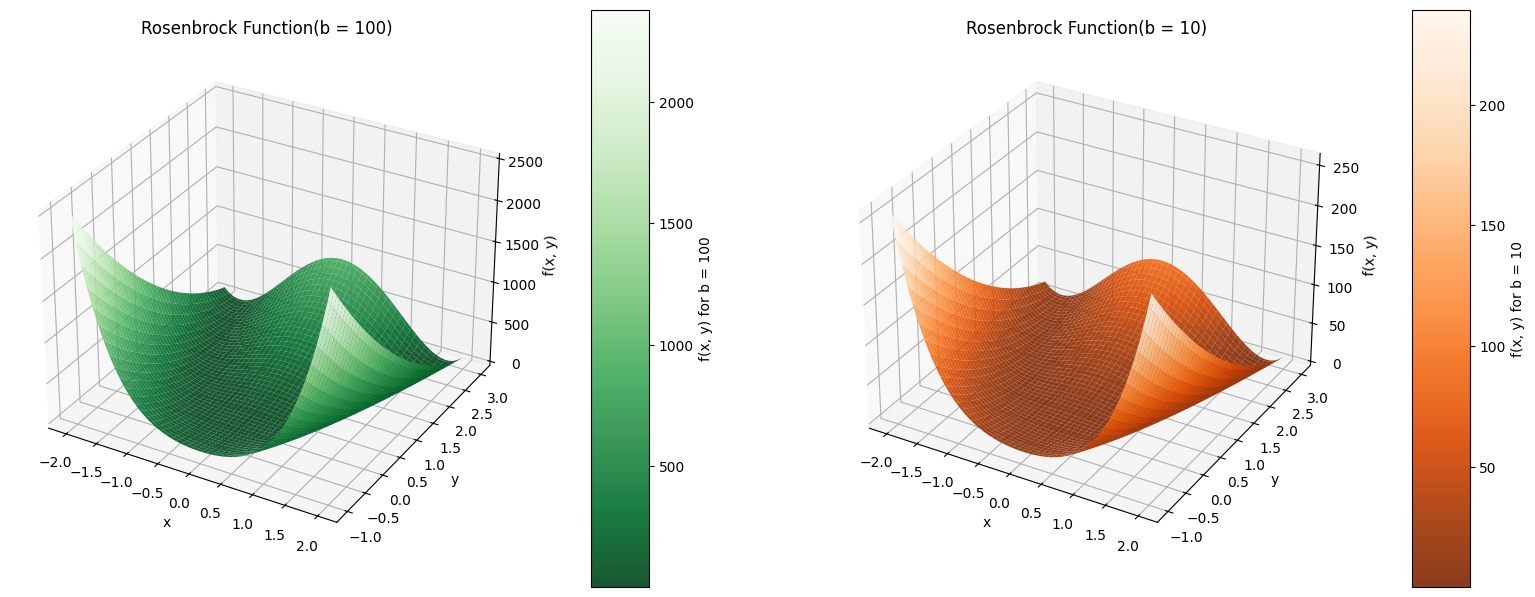

In [ ]:
fig1 = plt.figure(figsize=(30, 15))

ax1 = fig1.add_subplot(1, 3, 1, projection='3d')

surf_b100 = ax1.plot_surface(X, Y, Z_b100, cmap='Greens_r', edgecolor='none', alpha=0.9)
ax1.set_title('Rosenbrock Function(b = 100)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

fig1.colorbar(surf_b100, ax=ax1, shrink=0.5, aspect=10, pad=0.1, label='f(x, y) for b = 100')

ax2 = fig1.add_subplot(1, 3, 2, projection='3d')

surf_b10 = ax2.plot_surface(X, Y, Z_b10, cmap='Oranges_r', edgecolor='none', alpha=0.9)
ax2.set_title('Rosenbrock Function(b = 10)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')

fig1.colorbar(surf_b10, ax=ax2, shrink=0.5, aspect=10, pad=0.1, label='f(x, y) for b = 10')

plt.show()

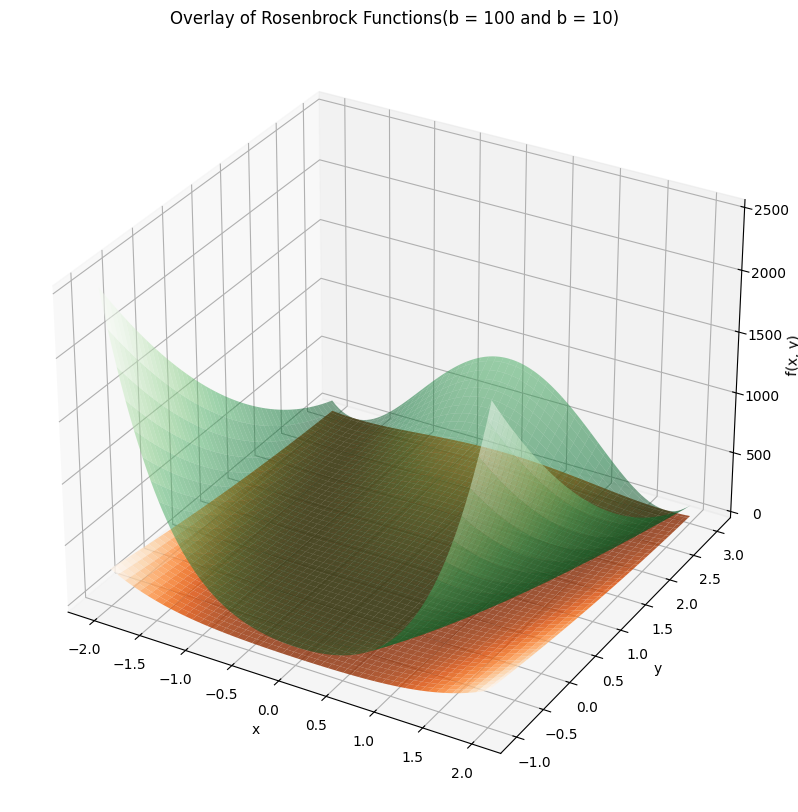

In [ ]:
fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(1, 1, 1, projection='3d')

surf_b100_overlay = ax.plot_surface(X, Y, Z_b100, cmap='Greens_r', edgecolor='none', alpha=0.5)
surf_b10_overlay = ax.plot_surface(X, Y, Z_b10, cmap='Oranges_r', edgecolor='none', alpha=0.8)

ax.set_title('Overlay of Rosenbrock Functions(b = 100 and b = 10)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

## Check Why Rosenbrock Function is Non-convex optimization
Usually, these parameters are set such that $a = 1$ and $b = 100$

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

### Verifying Convexity
(1) By Definition
$$ f(\theta x_1 + (1-\theta)x_2) \le \theta f(x_1) + (1-\theta)f(x_2)$$



Let $\theta = 0.5, x_1 = (-1, 1), x_2 = (1, 1)$


* $0.5x_1 + 0.5x_2 = 0.5(-1, 1) + 0.5(1, 1) = (0, 1)$

$\rightarrow$ $f(0.5 x_1 + 0.5 x_2) = f(0, 1) = 101$



* $f(x_1) = f(-1, 1) = 4$
* $f(x_2) = f(1, 1) = 0$

$\rightarrow$ $0.5f(x_1) + 0.5f(x_2) = 2$



$ 101 \leq 2 $ → **CONTRADICTION**

(2) First Order Convexity
$$f(x_2) \ge f(x_1) + \nabla f(x_1)^T(x_2 - x_1)$$



Let $x_1 = (0, 1), x_2 = (1, 1)$
* $\nabla f(x_1) = \nabla f(0, 1) = \begin{bmatrix} -2 \\ 200 \end{bmatrix}$
* $x_2 - x_1 = (1, 1) - (0, 1) = (1, 0)$
* $f(x_1) = f(0, 1) = 101$



$\rightarrow$ $f(x_1) + \nabla f(x_1)^T(x_2 - x_1) = 101 - 2 = 99$
$\rightarrow$ $f(x_2) = f(1, 1) = 0$



$0 \geq 99$

(3) Second Order Convexity
* $\frac{{\partial}^2 f }{\partial x^2} = 2 - 400y + 1200x^2$
* $\frac{{\partial}^2 f }{\partial y^2} = 200$
* $\frac{{\partial}^2 f }{\partial x \partial y} = \frac{{\partial}^2
f}{\partial y \partial x} = -400x$

$$
H(x, y) = \begin{bmatrix} 2 - 400y + 1200x^2 & -400x \\
-400x & 200\end{bmatrix}$$

$$det(H(0, 1)) = det(\begin{bmatrix} -398 & 0 \\
0 & 200 \end{bmatrix}) \leq 0$$

**Not Positive Semi Definite**


### Rosenbrock Function is Non-Convex

## Optimization

### Gradient Descent
$$x_{k + 1} = x_k - \eta \nabla f(x_k)$$


#### Apply Gradient Descent
$$ \nabla f(x, y) = \begin{bmatrix} 2x - 2 - 400x(y - x^2) \\ 200(y - x^2) \end{bmatrix}$$

$$\begin{aligned} x_{k+1} &= x_k - \eta(2x_k - 2 - 400x_{k} y_{k} + 400x_{k}^3)\\
y_{k+1} &= y_k - \eta(200y_k - 200x_{k}^2)
\end{aligned}$$

#### Optimum Learning Rate (Is it L-Smooth?)
We know that Lipschitz Continuous implies that there exists an upper bound on the magnitude of the gradient, and similarly L-smooth implies that there exists an upper bound on the magnitude of the curvature


But, In this function Hessian Matrix $H_{11} = 2 - 400y + 1200x^2$ can become infinitely large, so it is not **L-smooth** (Cannot find Lipschitz Constant)


**We find proper learning rate manually**

In [ ]:
# define rosenbrock function
def rosenbrock(x, y, a=1, b=100):
  return (a - x)**2 + b * (y - x**2)**2

# define gradient of rosenbrock
def rosenbrock_grad(x, y, a=1, b=100):
  dx = -2 * (a - x) - 4 * b * x * (y - x**2)
  dy = 2 * b * (y - x**2)

  return np.array([dx, dy])

# find learning rate manually
# learning_rate = 0.003, n_iter = 10000 → x = (0.7393, 0.5974), Value = 0.32659494275691541842
# learning_rate = 0.0025, n_iter = 10000 → x = (0.8478, 0.7583), Value = 0.17891162324085801982
# learning_rate = 0.002, n_iter = 20000 → x = (0.9984, 0.9988), Value = 0.00039652526438302372
# learning_rate = 0.002, n_iter = 10000 → x = (0.9999, 0.9998), Value = 0.00000001042505562227
learning_rate = 0.002

n_iter = 10000
x_0 = np.array([0.0, 0.0])

# history of point
x_hist_gd = [x_0]
loss_hist_gd = [rosenbrock(x_0[0], x_0[1])]
grad_hist_gd = [rosenbrock_grad(x_0[0], x_0[1])]
x = x_0

for i in range(n_iter):
  grad = rosenbrock_grad(x[0], x[1])
  grad_hist_gd.append(grad)
  x = x - learning_rate * grad
  x_hist_gd.append(x)
  loss_hist_gd.append(rosenbrock(x[0], x[1]))


  if i % 1000 == 0:
    print(f'Iteration {i}: x = ({x[0]:.6f}, {x[1]:.6f}), Value = {rosenbrock(x[0], x[1]):.10f}')

x_hist_gd = np.array(x_hist_gd)
loss_hist_gd = np.array(loss_hist_gd)
grad_hist_gd = np.array(grad_hist_gd)

Iteration 0: x = (0.004000, 0.000000), Value = 0.9920160256
Iteration 1000: x = (0.822510, 0.675734), Value = 0.0315649095
Iteration 2000: x = (0.932295, 0.868892), Value = 0.0045919415
Iteration 3000: x = (0.971348, 0.943401), Value = 0.0008222778
Iteration 4000: x = (0.987437, 0.974982), Value = 0.0001580752
Iteration 5000: x = (0.994412, 0.988833), Value = 0.0000312739
Iteration 6000: x = (0.997499, 0.994995), Value = 0.0000062642
Iteration 7000: x = (0.998878, 0.997752), Value = 0.0000012616
Iteration 8000: x = (0.999496, 0.998990), Value = 0.0000002547
Iteration 9000: x = (0.999773, 0.999546), Value = 0.0000000515


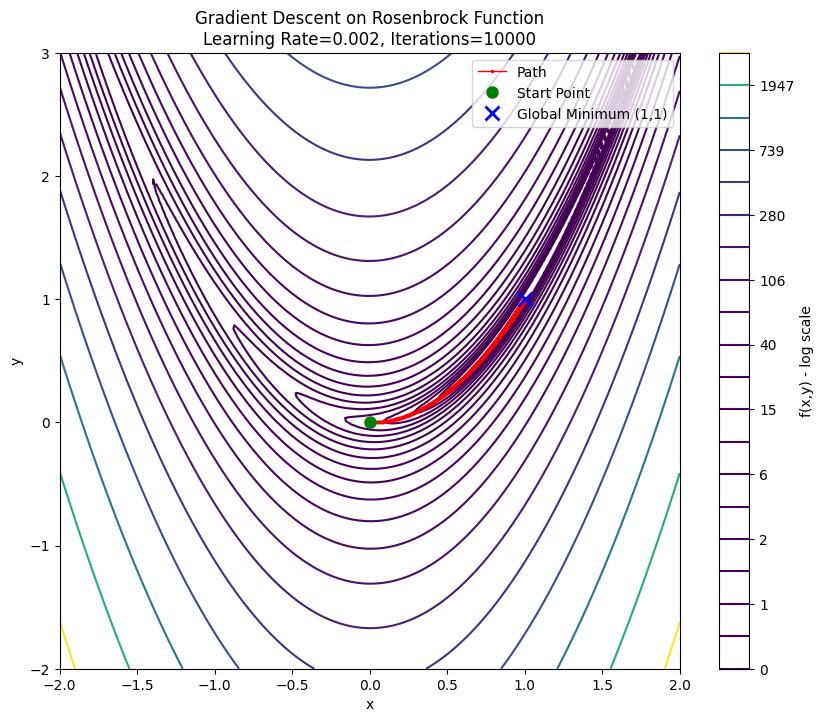

Final Point(10000 iterations) : x = (0.999898, 0.999796), Value = 0.00000001042505562227


In [ ]:
# draw grid x = -2 ~ x = 2
x_vals = np.linspace(-2, 2, 200)
# draw grid y = -2 ~ y = 3
y_vals = np.linspace(-2, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 8))
# draw contour line from z = 10^(-0.5) ~ z = 10^(3.5)
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20, base=10), cmap='viridis')
# draw path of x
plt.plot(x_hist_gd[:, 0], x_hist_gd[:, 1], 'r.-', label='Path', markersize=3, linewidth=1)
# draw start point
plt.plot(x_0[0], x_0[1], 'go', label='Start Point', markersize=8)
# draw global minimum point
plt.plot(1, 1, 'bx', label='Global Minimum (1,1)', markersize=10, mew=2)


plt.title(f'Gradient Descent on Rosenbrock Function\nLearning Rate={learning_rate}, Iterations={n_iter}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# show z value for log scale
plt.colorbar(label='f(x,y) - log scale')
plt.show()

print(f'Final Point({n_iter} iterations) : x = ({x[0]:.6f}, {x[1]:.6f}), Value = {rosenbrock(x[0], x[1]):.20f}')

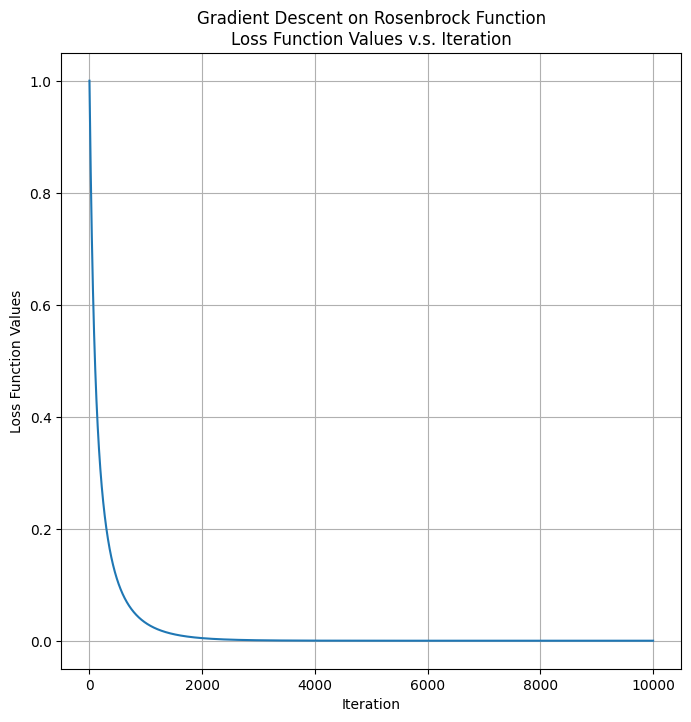

In [ ]:
# loss function values v.s. iteration
plt.figure(figsize=(8, 8))
plt.plot(np.arange(n_iter + 1), loss_hist_gd)

plt.title('Gradient Descent on Rosenbrock Function\nLoss Function Values v.s. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss Function Values')
plt.grid(True)

plt.show()

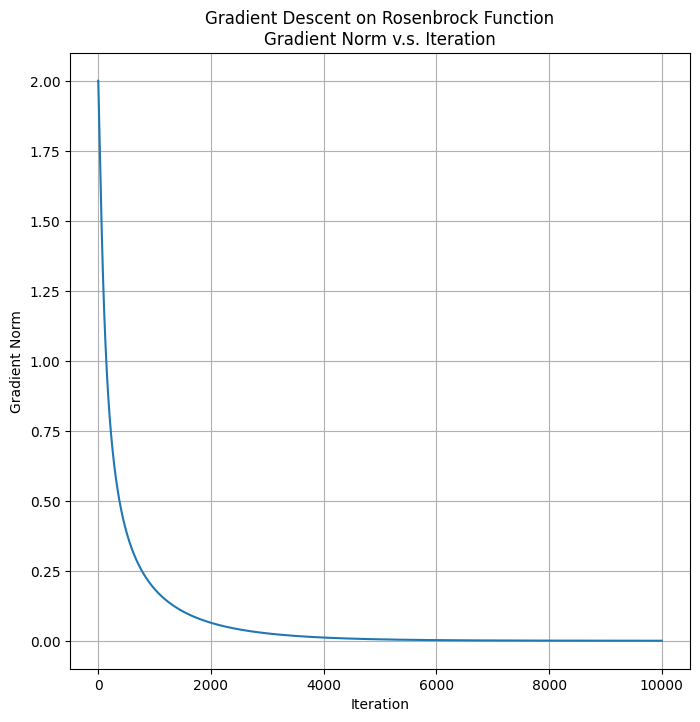

In [ ]:
# gradient norm v.s. iteration
grad_norm_gd = []
for g in grad_hist_gd:
  grad_norm_gd.append(np.linalg.norm(g))

plt.figure(figsize=(8, 8))
plt.plot(np.arange(n_iter + 1), grad_norm_gd)

plt.title('Gradient Descent on Rosenbrock Function\nGradient Norm v.s. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.grid(True)

plt.show()

### RMSProp
$$\begin{aligned}
h_t &= \beta h_{t-1} + (1-\beta)g(t) \odot g(t) \\
w_{t+1} &= w_t - \frac{\eta}{\sqrt{\epsilon I + h_t}} \odot g_t
\end{aligned}$$

#### Apply RMSProp
$$g(t) = \nabla f(x, y) = \begin{bmatrix} 2x - 2 - 400x(y - x^2) \\ 200(y - x^2) \end{bmatrix}$$

$$ g(t) \odot g(t) = \begin{bmatrix} (2x - 2 - 400x(y - x^2))^2 \\ (200(y - x^2))^2 \end{bmatrix}$$

In [ ]:
# define rosenbrock function
def rosenbrock(x, y, a=1, b=100):
  return (a - x)**2 + b * (y - x**2)**2

# define gradient of rosenbrock
def rosenbrock_grad(x, y, a=1, b=100):
  dx = -2 * (a - x) - 4 * b * x * (y - x**2)
  dy = 2 * b * (y - x**2)

  return np.array([dx, dy])

n_feature = 2
weight = np.zeros(n_feature)      # (0.0, 0.0)
cache = np.zeros(n_feature)       # (0.0, 0.0)

# history of loss/grad
x_hist_rmsprop = []
loss_hist_rmsprop = []
grad_hist_rmsprop = []

# find learning rate manually
# learning_rate = 0.01, n_iter = 20000 → x = (0.980149, 0.975543), Value = 0.02215371277227389316
# learning_rate = 0.005, n_iter = 20000 → x = (0.993759, 0.995039), Value = 0.00559851927696239891
# learning_rate = 0.001, n_iter = 20000 → x = (0.999350, 1.000200), Value = 0.00022507750726225530
# learning_rate = 0.0005, n_iter = 20000 → x = (1.000213, 0.999675), Value = 0.00005632983831780233
learning_rate = 0.0001

n_iter = 20000
epsilon = 1e-8
beta = 0.99

for i in range(n_iter):
  x_hist_rmsprop.append([weight[0], weight[1]])
  loss_hist_rmsprop.append(rosenbrock(weight[0], weight[1]))
  grad = rosenbrock_grad(weight[0], weight[1])
  grad_hist_rmsprop.append(grad)

  cache = beta * cache + (1 - beta) * grad **2
  weight -= learning_rate * grad / (np.sqrt(cache) + epsilon)

  if i % 1000 == 0:
    print(f'Iteration {i}: x = ({weight[0]:.6f}, {weight[1]:.6f}), Value = {rosenbrock(weight[0], weight[1]):.10f}')

x_hist_rmsprop = np.array(x_hist_rmsprop)
loss_hist_rmsprop = np.array(loss_hist_rmsprop)
grad_hist_rmsprop = np.array(grad_hist_rmsprop)

Iteration 0: x = (0.001000, 0.000000), Value = 0.9980010002
Iteration 1000: x = (0.111506, 0.012465), Value = 0.7894213260
Iteration 2000: x = (0.210338, 0.044267), Value = 0.6235664070
Iteration 3000: x = (0.309009, 0.095496), Value = 0.4774683645
Iteration 4000: x = (0.407471, 0.166022), Value = 0.3510905258
Iteration 5000: x = (0.505648, 0.255638), Value = 0.2443842543
Iteration 6000: x = (0.603231, 0.363747), Value = 0.1574275399
Iteration 7000: x = (0.695376, 0.482455), Value = 0.0929154361
Iteration 8000: x = (0.766818, 0.586555), Value = 0.0545855519
Iteration 9000: x = (0.826992, 0.682865), Value = 0.0300422461
Iteration 10000: x = (0.882272, 0.777705), Value = 0.0139087528
Iteration 11000: x = (0.932583, 0.869302), Value = 0.0045617839
Iteration 12000: x = (0.972620, 0.945757), Value = 0.0007551074
Iteration 13000: x = (0.991039, 0.981980), Value = 0.0000834767
Iteration 14000: x = (0.997095, 0.994039), Value = 0.0000109823
Iteration 15000: x = (0.999074, 0.997995), Value = 0.

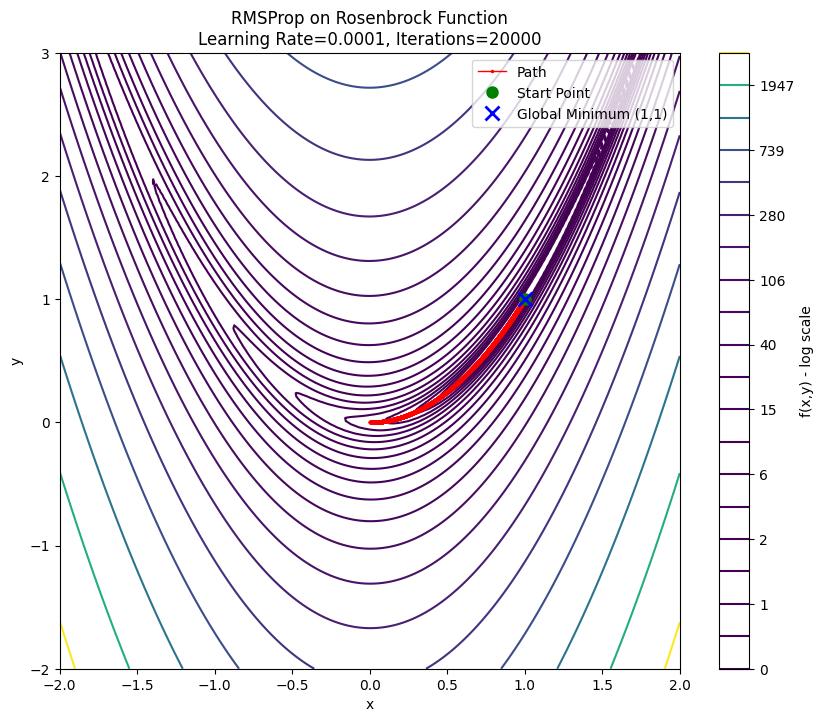

Final Point(20000 iterations) : x = (0.999945, 1.000039), Value = 0.00000225236451951153


In [ ]:
# draw grid x = -2 ~ x = 2
x_vals = np.linspace(-2, 2, 200)
# draw grid y = -2 ~ y = 3
y_vals = np.linspace(-2, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

fig_rmsprop = plt.figure(figsize=(10, 8))
# draw contour line from z = 10^(-0.5) ~ z = 10^(3.5)
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20, base=10), cmap='viridis')
# draw path of x
plt.plot(x_hist_rmsprop[:, 0], x_hist_rmsprop[:, 1], 'r.-', label='Path', markersize=3, linewidth=1)
# draw start point
plt.plot(weight[0], weight[1], 'go', label='Start Point', markersize=8)
# draw global minimum point
plt.plot(1, 1, 'bx', label='Global Minimum (1,1)', markersize=10, mew=2)


plt.title(f'RMSProp on Rosenbrock Function\nLearning Rate={learning_rate}, Iterations={n_iter}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# show z value for log scale
plt.colorbar(label='f(x,y) - log scale')
plt.show()

print(f'Final Point({n_iter} iterations) : x = ({weight[0]:.6f}, {weight[1]:.6f}), Value = {loss_hist_rmsprop[-1]:.20f}')

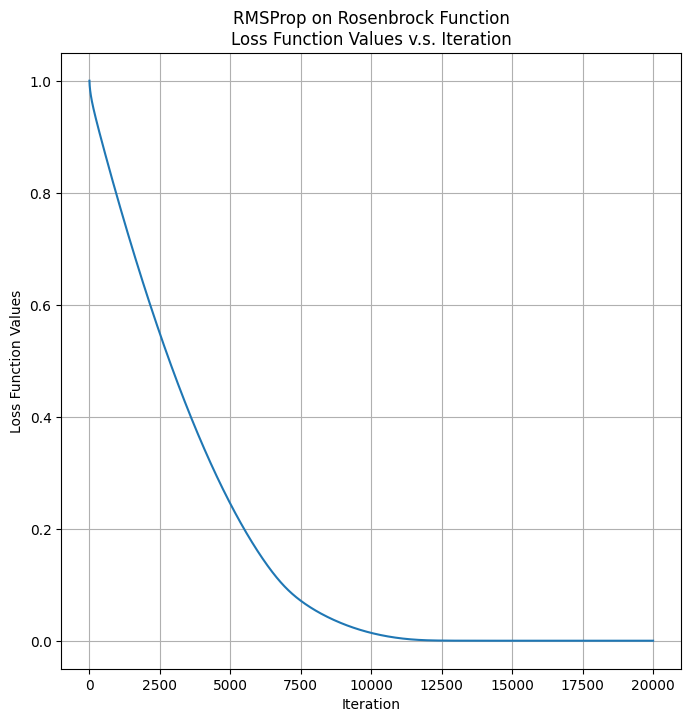

In [ ]:
# loss function values v.s. iteration
plt.figure(figsize=(8, 8))
plt.plot(np.arange(n_iter), loss_hist_rmsprop)

plt.title('RMSProp on Rosenbrock Function\nLoss Function Values v.s. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss Function Values')
plt.grid(True)

plt.show()

#### As in the plot below, we can see the **zigzag on the narrow valley walls** of Rosenbrock.:

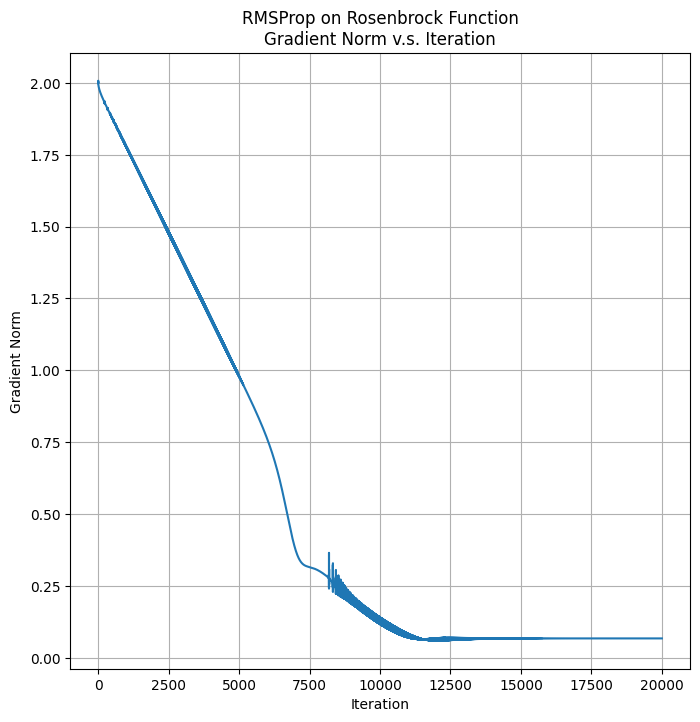

In [ ]:
# gradient norm v.s. iteration
grad_norm_rmsprop = []
for g in grad_hist_rmsprop:
  grad_norm_rmsprop.append(np.linalg.norm(g))

plt.figure(figsize=(8, 8))
plt.plot(np.arange(n_iter), grad_norm_rmsprop)

plt.title('RMSProp on Rosenbrock Function\nGradient Norm v.s. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.grid(True)

plt.show()

#### If you zoom in on that area, you can actually see the values ​​jumping around.

This phenomenon slows down the convergence speed. This zigzag phenomenon can cause the gradient norm to fluctuate during the optimization process, slowing down the convergence speed.

[np.float64(0.7975477431223919), np.float64(0.8094214868364183)]
[np.float64(0.634863525326306), np.float64(0.6540523501907974)]


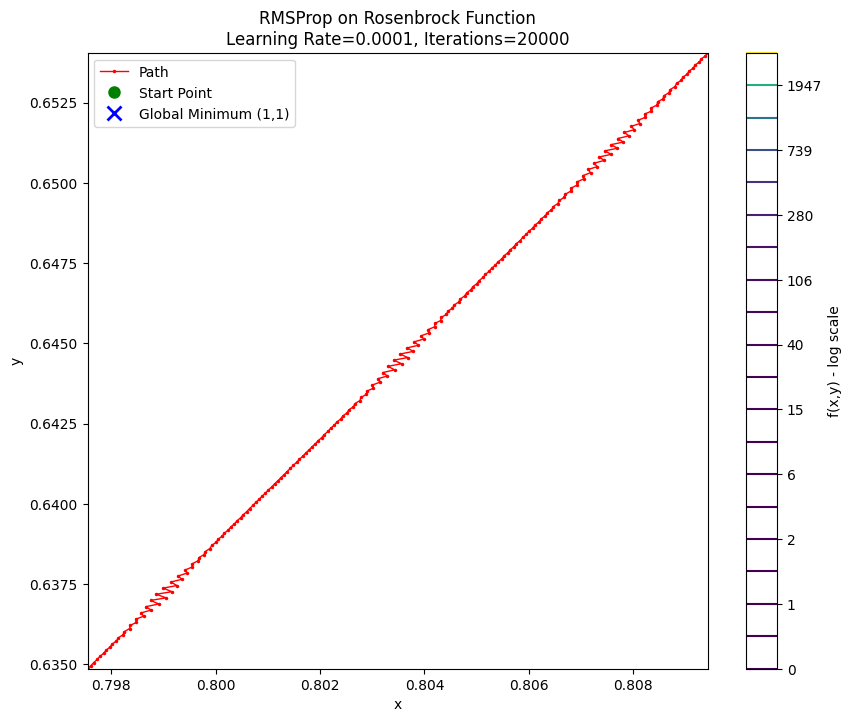

In [ ]:
x_lim = [x_hist_rmsprop[8500][0], x_hist_rmsprop[8700][0]]
y_lim = [x_hist_rmsprop[8500][1], x_hist_rmsprop[8700][1]]

print(x_lim)
print(y_lim)

plt.figure(fig_rmsprop)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

### Adam
$$\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1)g_t \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2)(g_t \odot g_t) \\
\hat{m} &= \frac{m_t}{1-\beta_{1}^t}, \hat{v} = \frac{v_t}{1-\beta_{2}^t} \\
w_{t+1} &= w_t - \frac{\eta}{\epsilon + \sqrt{\hat{v}}} \hat{m}
\end{aligned}$$

In [ ]:
# define rosenbrock function
def rosenbrock(x, y, a=1, b=100):
  return (a - x)**2 + b * (y - x**2)**2

# define gradient of rosenbrock
def rosenbrock_grad(x, y, a=1, b=100):
  dx = -2 * (a - x) - 4 * b * x * (y - x**2)
  dy = 2 * b * (y - x**2)

  return np.array([dx, dy])

n_feature = 2
weight = np.zeros(n_feature)       # (0.0, 0.0)
cache1 = np.zeros(n_feature)       # (0.0, 0.0)
cache2 = np.zeros(n_feature)       # (0.0, 0.0)

# history of loss/grad
x_hist_adam = []
loss_hist_adam = []
grad_hist_adam = []

# find learning rate manually
# learning_rate = 0.1, n_iter = 20000 → x = (1.016130, 0.976294), Value = 0.30791266436718384147
# learning_rate = 0.01, n_iter = 8000 → x = (0.999993, 0.999987), Value = 0.00000000004732617735
# learning_rate = 0.0005, n_iter = 5000 → x = (0.999727, 0.999440), Value = 0.00000009650699054136
# learning_rate = 0.00001, n_iter = 130000 → x = (1.000000, 1.000000), Value = 0.00000000000000000000
learning_rate = 0.001

n_iter = 4000
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999

for i in range(1, n_iter + 1):
  x_hist_adam.append([weight[0], weight[1]])
  loss_hist_adam.append(rosenbrock(weight[0], weight[1]))
  grad = rosenbrock_grad(weight[0], weight[1])
  grad_hist_adam.append(grad)

  cache1 = beta1 * cache1 + (1 - beta1) * grad
  cache2 = beta2 * cache2 + (1 - beta2) * grad **2
  m_hat = cache1 / (1 - beta1 ** i)
  v_hat = cache2 / (1 - beta2 ** i)
  weight -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

  if i % 1000 == 0:
    print(f'Iteration {i}: x = ({weight[0]:.6f}, {weight[1]:.6f}), Value = {rosenbrock(weight[0], weight[1]):.10f}')

x_hist_adam = np.array(x_hist_adam)
loss_hist_adam = np.array(loss_hist_adam)
grad_hist_adam = np.array(grad_hist_adam)

Iteration 1000: x = (0.739671, 0.547072), Value = 0.0677713808
Iteration 2000: x = (0.977366, 0.955239), Value = 0.0005123139
Iteration 3000: x = (0.999707, 0.999415), Value = 0.0000000857
Iteration 4000: x = (1.000000, 1.000000), Value = 0.0000000000


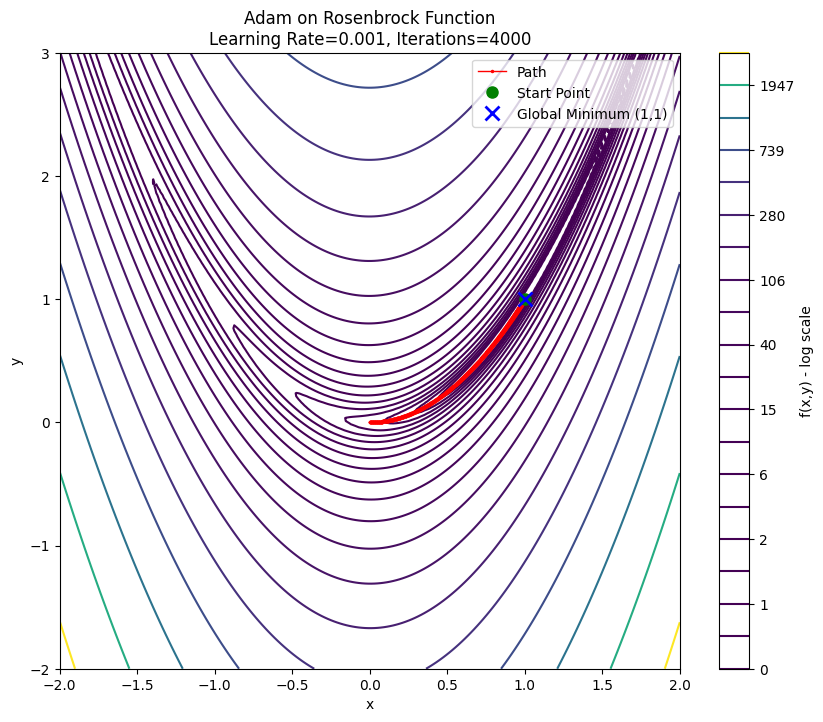

Final Point(4000 iterations) : x = (1.000000, 1.000000), Value = 0.00000000000004059159


In [ ]:
# draw grid x = -2 ~ x = 2
x_vals = np.linspace(-2, 2, 200)
# draw grid y = -2 ~ y = 3
y_vals = np.linspace(-2, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

fig_adam = plt.figure(figsize=(10, 8))
# draw contour line from z = 10^(-0.5) ~ z = 10^(3.5)
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20, base=10), cmap='viridis')
# draw path of x
plt.plot(x_hist_adam[:, 0], x_hist_adam[:, 1], 'r.-', label='Path', markersize=3, linewidth=1)
# draw start point
plt.plot(weight[0], weight[1], 'go', label='Start Point', markersize=8)
# draw global minimum point
plt.plot(1, 1, 'bx', label='Global Minimum (1,1)', markersize=10, mew=2)


plt.title(f'Adam on Rosenbrock Function\nLearning Rate={learning_rate}, Iterations={n_iter}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# show z value for log scale
plt.colorbar(label='f(x,y) - log scale')
plt.show()

print(f'Final Point({n_iter} iterations) : x = ({weight[0]:.6f}, {weight[1]:.6f}), Value = {loss_hist_adam[-1]:.20f}')

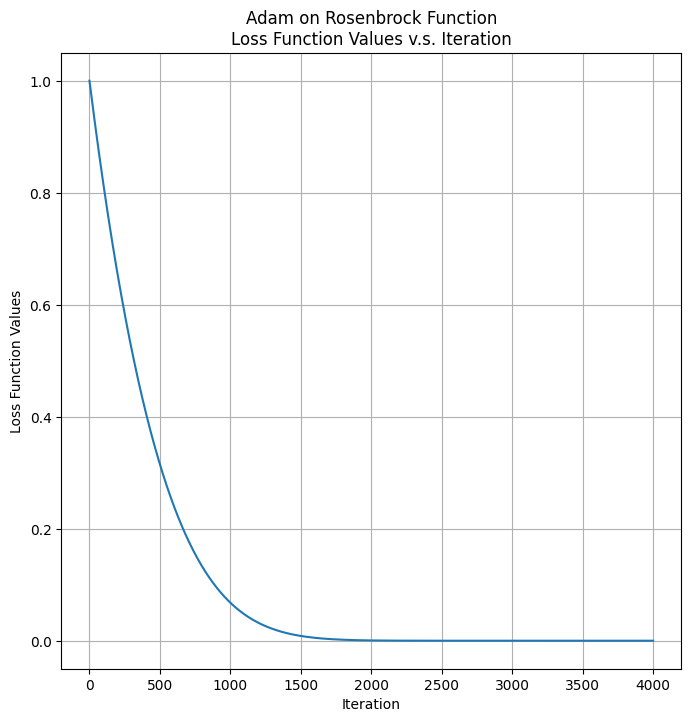

In [ ]:
# loss function values v.s. iteration
plt.figure(figsize=(8, 8))
plt.plot(np.arange(n_iter), loss_hist_adam)

plt.title('Adam on Rosenbrock Function\nLoss Function Values v.s. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss Function Values')
plt.grid(True)

plt.show()

#### As in the plot below, we can see the **zigzag on the narrow valley walls** of Rosenbrock.:

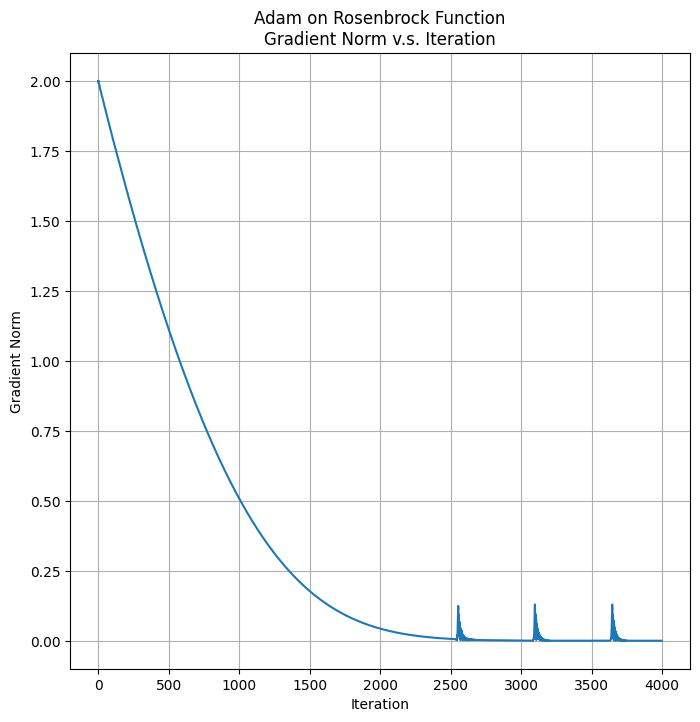

In [ ]:
# gradient norm v.s. iteration
grad_norm_adam = []
for g in grad_hist_adam:
  grad_norm_adam.append(np.linalg.norm(g))

fig_adam_norm = plt.figure(figsize=(8, 8))
plt.plot(np.arange(n_iter), grad_norm_adam)

plt.title('Adam on Rosenbrock Function\nGradient Norm v.s. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.grid(True)

plt.show()

#### If you zoom in on that area, you can actually see the values ​​jumping around.

This phenomenon slows down the convergence speed. This zigzag phenomenon can cause the gradient norm to fluctuate during the optimization process, slowing down the convergence speed.

[np.float64(0.9965578736344464), np.float64(0.9986096245732345)]
[np.float64(0.993126829081544), np.float64(0.9972206728838797)]


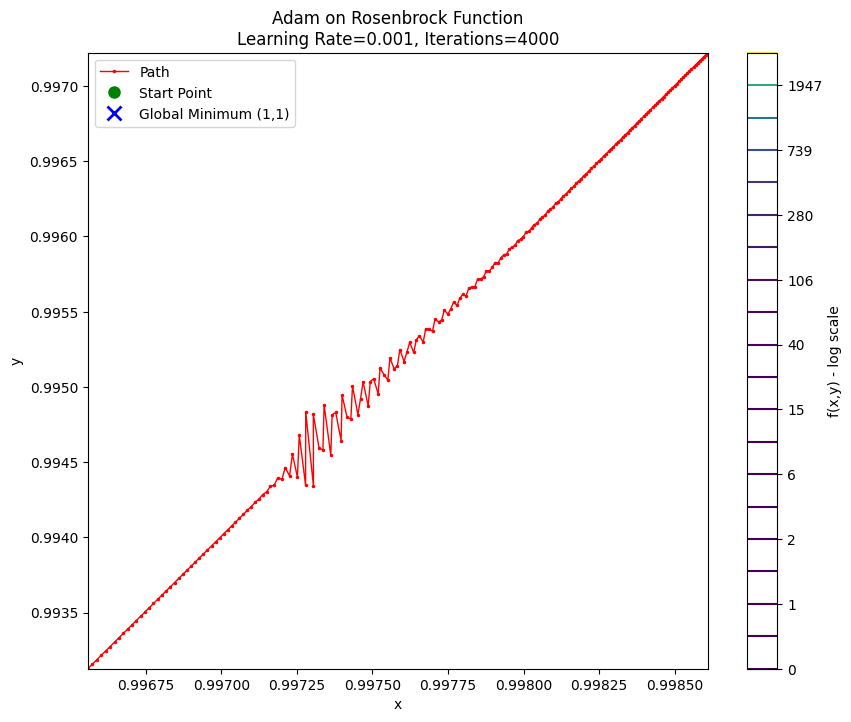

In [ ]:
x_lim = [x_hist_adam[2500][0], x_hist_adam[2700][0]]
y_lim = [x_hist_adam[2500][1], x_hist_adam[2700][1]]

print(x_lim)
print(y_lim)

plt.figure(fig_adam)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

# Compare Three Optimizer

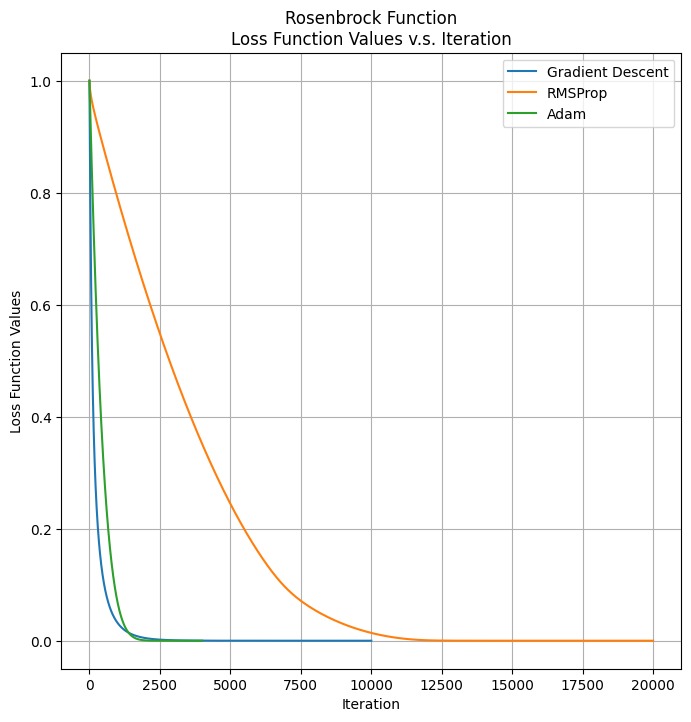

In [ ]:
# Compare three optimizer for loss function
plt.figure(figsize=(8, 8))

plt.plot(loss_hist_gd, label='Gradient Descent')
plt.plot(loss_hist_rmsprop, label='RMSProp')
plt.plot(loss_hist_adam, label='Adam')

plt.title('Rosenbrock Function\nLoss Function Values v.s. Iteration')
plt.xlabel("Iteration")
plt.ylabel("Loss Function Values")
plt.grid(True)
plt.legend()

plt.show()

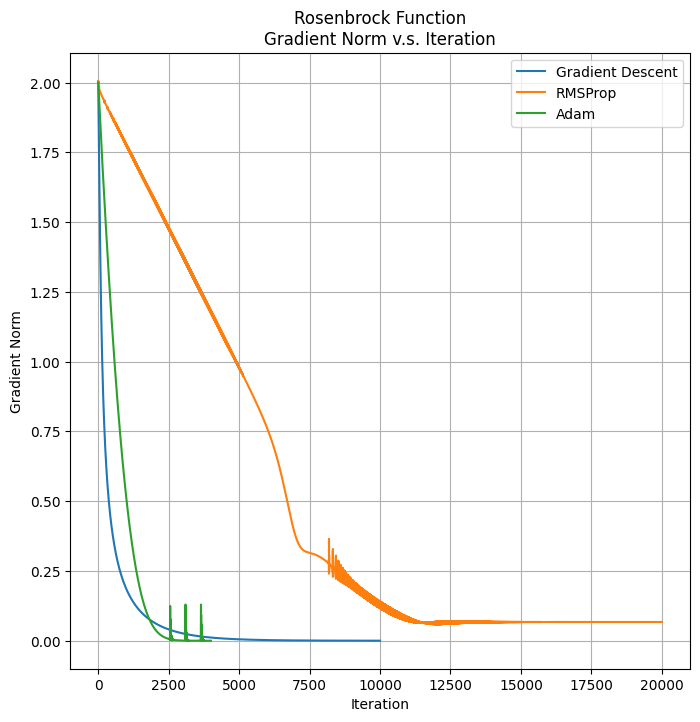

In [ ]:
# Compare three optimizer for gradient norm
plt.figure(figsize=(8, 8))

plt.plot(grad_norm_gd, label='Gradient Descent')
plt.plot(grad_norm_rmsprop, label='RMSProp')
plt.plot(grad_norm_adam, label='Adam')

plt.title('Rosenbrock Function\nGradient Norm v.s. Iteration')
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.legend()

plt.show()